# Portfolio Optmization 
This notebook build a portfolio with 5 stocks from the CAC 40 stocks, by using the Markowitz optimization.

## Libraries installation and importation


In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance


import yfinance as yf
import datetime as dt

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

## Dates & Other Constants


In [2]:
# Define path to files
path="/Users/vince/ML_2023/Finance/Stocks/CAC/"
# Start date defaults
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = "2017-01-03"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2023
E_MONTH =2
E_DAY = 15
E_DATE_STR = "2023-02-15"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

## Get Stock File Names in a List


In [4]:
tickers=['ATO.PA','WLN.PA','BN.PA','AIR.PA','AI.PA','DG.PA','VIV.PA','SU.PA','AC.PA','ORA.PA','ACA.PA','ML.PA','BNP.PA','SGO.PA','ENGI.PA','CAP.PA','EN.PA','GLE.PA','VIE.PA','RI.PA','SAN.PA','CA.PA','KER.PA','SW.PA','MC.PA','LR.PA','HO.PA','OR.PA']
stocks_not_downloaded = []
missing_stocks = []

## Functions 

In [5]:
def save_to_csv_from_yahoo(folder, ticker, S_YEAR,S_MONTH ,S_DAY ,E_YEAR,E_MONTH,E_DAY):
    for ticker in tickers:
        try: 
            print("Get Data for :", ticker)
            df = yf.download(ticker, start=S_DATE_DATETIME, end=E_DATE_DATETIME)['Adj Close']
            df.to_csv(folder + ticker + '.csv')
        except Exception as ex:
            stocks_not_downloaded.append(ticker)
            print("Couldn't Get Data for :", ticker)
def get_df_from_csv(folder, ticker):
    try:
        df = pd.read_csv(folder + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df
def get_column_from_csv(file, col_name):
    try:
        df = pd.read_csv(file)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df[col_name]
    
def delete_unnamed_cols(df):
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    return df
def save_dataframe_to_csv(df, path, ticker):
    df.to_csv(path + ticker + '.csv')
    
    
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    # Save data to a CSV file
    df.to_csv("C:/Users/vince/ML_2023/Finance/Stocks/" + ticker + '.csv')
    return df  

# Return 1st Valid Date in Dataframe
def get_valid_dates(df, sdate, edate):  
    try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate) 
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()
        date_leading = '-'.join(('0' if len(x)<2 else '')+x for x in sm_date.split('-'))
        date_ending = '-'.join(('0' if len(x)<2 else '')+x for x in last_date.split('-'))
    except Exception:
        print("Date Corrupted")
    else:
        return date_leading, date_ending
    
# Returns Return on Investment over Time
def roi_between_dates(df, sdate, edate):
    try: 
        start_val = df.loc[sdate,'Adj Close'] 
        end_val = df.loc[edate,'Adj Close']
        roi = ((end_val - start_val) / start_val)
    except Exception:
        print("Data Corrupted")
    else:
        return roi
# Get Mean Between Dates
def get_mean_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].mean()
def get_sd_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].std()
def get_cov_between_dates(df, sdate, edate):
    mean = get_mean_between_dates(df, sdate, edate)
    sd = get_sd_between_dates(df, sdate, edate)
    return sd / mean

Get Data for : ATO.PA
[*********************100%***********************]  1 of 1 completed
Get Data for : WLN.PA
[*********************100%***********************]  1 of 1 completed
Get Data for : BN.PA
[*********************100%***********************]  1 of 1 completed
Get Data for : AIR.PA
[*********************100%***********************]  1 of 1 completed
Get Data for : AI.PA
[*********************100%***********************]  1 of 1 completed
Get Data for : DG.PA
[*********************100%***********************]  1 of 1 completed
Get Data for : VIV.PA
[*********************100%***********************]  1 of 1 completed
Get Data for : SU.PA
[*********************100%***********************]  1 of 1 completed
Get Data for : AC.PA
[*********************100%***********************]  1 of 1 completed
Get Data for : ORA.PA
[*********************100%***********************]  1 of 1 completed
Get Data for : ACA.PA
[*********************100%***********************]  1 of 1 completed
Get 

In [ ]:
save_to_csv_from_yahoo(path,tickers,S_YEAR,S_MONTH ,S_DAY ,E_YEAR,E_MONTH,E_DAY)

In [6]:
for ticker in list(tickers):
    stock_df=get_df_from_csv(path, ticker)
    stock_df=add_daily_return_to_df(stock_df,ticker)
    stock_df=delete_unnamed_cols(stock_df)
    save_dataframe_to_csv(stock_df,path, ticker)

## 11 Stock Market Sectors

In [12]:
sec_df = pd.read_csv('C:/Users/vince/ML_2023/Finance/cac.csv')
sec_df

# Get Industrials DF
indus_df = sec_df.loc[sec_df['Sector'] == "Industrials"]
health_df = sec_df.loc[sec_df['Sector'] == "Health Care"]
it_df = sec_df.loc[sec_df['Sector'] == "Information Technology"]
comm_df = sec_df.loc[sec_df['Sector'] == "Communication Services"]
staple_df = sec_df.loc[sec_df['Sector'] == "Consumer Staples"]
discretion_df = sec_df.loc[sec_df['Sector'] == "Consumer Discretionary"]
utility_df = sec_df.loc[sec_df['Sector'] == "Utilities"]
financial_df = sec_df.loc[sec_df['Sector'] == "Financials"]
material_df = sec_df.loc[sec_df['Sector'] == "Materials"]
restate_df = sec_df.loc[sec_df['Sector'] == "Real Estate"]
energy_df = sec_df.loc[sec_df['Sector'] == "Energy"]

## Returns a DF with ROIs for all Stocks


In [13]:
def get_rois_for_stocks(stock_df):
    # Will hold all tickers & stock rois
    tickers = []
    rois = []

    # iterrows provides the index and column for each row in the DF
    for index, row in stock_df.iterrows():
        df = get_df_from_csv(path,row['Ticker'])
    
        # If we can't find the ticker delete it from the dataframe
        if df is None:
            pass
            # print(row['Symbol'], " is not available")
        else:
            tickers.append(row['Ticker'])
            sdate, edate = get_valid_dates(df, S_DATE_STR, E_DATE_STR)
            df = df.set_index(['Date'])
            roi = roi_between_dates(df, sdate, edate)
            rois.append(roi)
    return pd.DataFrame({'Ticker':tickers, 'ROI':rois})

In [14]:
industrial = get_rois_for_stocks(indus_df)
staple = get_rois_for_stocks(staple_df)
health_care = get_rois_for_stocks(health_df)
it = get_rois_for_stocks(it_df)
commun = get_rois_for_stocks(comm_df)
staple = get_rois_for_stocks(staple_df)
discretion = get_rois_for_stocks(discretion_df)
utility = get_rois_for_stocks(utility_df)
finance = get_rois_for_stocks(financial_df)
material = get_rois_for_stocks(material_df)
restate = get_rois_for_stocks(restate_df)
energy = get_rois_for_stocks(energy_df)

In [15]:
industrial.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
0,AIR.PA,1.013833


In [16]:
health_care.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
2,HO.PA,0.622080
1,SAN.PA,0.413252
0,ML.PA,0.344354


In [17]:
it.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
0,CA.PA,-0.178132


In [18]:
commun.sort_values(by=['ROI'], ascending=False).head(20)


,Ticker,ROI


In [19]:
staple.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
0,VIE.PA,1.178104
1,SW.PA,-0.069677


In [20]:
discretion.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
5,KER.PA,2.256758
3,CAP.PA,1.522966
0,AI.PA,1.074514
4,RI.PA,1.017125
1,DG.PA,0.989982


In [21]:
utility.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
2,ENGI.PA,0.657194
3,EN.PA,0.250677
1,ORA.PA,-0.073876
0,ATO.PA,-0.833851


In [22]:
finance.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
2,BNP.PA,0.530304
1,ACA.PA,0.342375
0,BN.PA,0.041628
3,GLE.PA,-0.113384


In [23]:
material.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
1,OR.PA,1.545751
0,WLN.PA,0.523254


In [24]:
restate.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI


In [25]:
energy.sort_values(by=['ROI'], ascending=False).head(5)


,Ticker,ROI
0,SU.PA,1.708394
1,SGO.PA,0.431337


## Portfolio List


In [26]:
port_list = ["AIR.PA","WLN.PA","SU.PA","KER.PA","SAN.PA"]

In [89]:
def get_stock_price_on_date(ticker, date):
    df = get_df_from_csv(path, ticker)
    df = df.set_index(['Date'])
    return df.loc[date,'Adj Close']

In [27]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(path, x)
        df['Date'] = pd.to_datetime(df['Date'])
        # Use a mask to grab data between defined dates
        mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

## Check for Correlation


In [65]:
mult_df = merge_df_by_column_name('daily_return',  S_DATE_STR, E_DATE_STR, *port_list)
mult_df

# Generate a Correlation Matrix
print(mult_df)

        AIR.PA    WLN.PA     SU.PA    KER.PA    SAN.PA
0          NaN       NaN       NaN       NaN       NaN
1    -0.001575 -0.008031  0.003200 -0.013309  0.000000
2     0.018927 -0.005084  0.003038 -0.008045 -0.000383
3     0.008359 -0.024035  0.006057  0.015983 -0.020187
4     0.002149 -0.011247  0.000000  0.015966  0.010823
...        ...       ...       ...       ...       ...
1564  0.008905 -0.016375 -0.012889 -0.009592  0.013976
1565  0.003177 -0.006565  0.021133  0.019898  0.007796
1566  0.000704 -0.050271 -0.011205 -0.034012 -0.005605
1567  0.016353 -0.012177  0.022930  0.012690 -0.011838
1568  0.003287  0.017610 -0.012902 -0.009177  0.005248

[1569 rows x 5 columns]


In [51]:
# 01-04-2021 is the 1st date in 2021
airbus=get_stock_price_on_date('AIR.PA', '2023-02-14') # 115.98*5
wln=get_stock_price_on_date('WLN.PA', '2023-02-14') # 40.45*14
su=get_stock_price_on_date('SU.PA', '2023-02-14') # 151.47*4
ker=get_stock_price_on_date('KER.PA', '2023-02-14') # 1 522.86
san=get_stock_price_on_date('SAN.PA', '2023-02-14') # 6*88.11
print("AIR.PA $", airbus) # 2 449.12
print("WLN.PA $", wln) # 1 357.74
print("SU.PA $", su) # 4 369.2
print("KER.PA $",ker) # 1 522.86
print("SAN.PA $", san) # 1 377.88

# Total Investment
tot_inv = 579.9 + 566.30 + 605.88 + 561.4 + 528.59
tot_inv

AIR.PA $ 115.9800033569336
WLN.PA $ 40.45000076293945
SU.PA $ 151.47999572753906
KER.PA $ 561.4000244140625
SAN.PA $ 88.11000061035156


2842.07

## Returns Portfolio Weight


In [53]:
def get_port_weight(price, total):
    return price / total
airbus = get_port_weight(579.9, 2842.07)
wln = get_port_weight( 566.30, 2842.07)
su = get_port_weight(605.88, 2842.07)
ker =get_port_weight(561.4 , 2842.07)
san = get_port_weight(528.59, 2842.07)

In [57]:
wts = np.array([airbus, wln, su, ker, san])
wts

array([0.20404142, 0.19925618, 0.21318265, 0.19753208, 0.18598768])

In [59]:
days = len(mult_df.index)
days

1569

In [60]:
port_var = np.dot(wts.T, np.dot(mult_df.cov() * days, wts))
print("Portfolio Covariance :", port_var)
print("airbus Var :", mult_df['AIR.PA'].var() * days)
print("san Var :", mult_df['SAN.PA'].var() * days)

Portfolio Covariance : 0.3279004709896636
airbus Var : 0.9597609843997057
san Var : 0.2577227389185508


# Different Types of Risk


### -Diversifiable Risk


In [61]:
# Diversifiable Risk = Portfolio Variance - All Weighted Variances
def calc_diversifiable_risk(df, tickers, weights):
    # Gets number of days
    days = len(mult_df.index)
    # Calculate covariance of portfolio
    port_covar = np.dot(weights.T, np.dot(df.cov() * days, weights)) 
    
    i = 0
    while i < len(tickers):
        wt_sq = weights[i] ** 2
        stk_var = mult_df[tickers[i]].var() * days
        wt_var = wt_sq * stk_var
        port_covar = port_covar - wt_var
        i += 1
    return port_covar
div_risk = calc_diversifiable_risk(mult_df, port_list, wts)
div_risk


0.20096125282101254

###  -Systematic Risk (Find Risk that Can't be Diversified)


In [63]:
print("Systematic Risk :", (port_var - div_risk))

Systematic Risk : 0.12693921816865103


## Markowitz Portfolio Optimization

In [70]:
mult_df_close = merge_df_by_column_name('Adj Close',  S_DATE_STR, E_DATE_STR, *port_list)
mult_df_close
print(mult_df_close)

          AIR.PA     WLN.PA       SU.PA      KER.PA     SAN.PA
0      57.682522  26.770000   55.751434  174.705093  62.345558
1      57.591679  26.555000   55.929829  172.380020  62.345558
2      58.681744  26.420000   56.099720  170.993179  62.321667
3      59.172268  25.785000   56.439522  173.726135  61.063610
4      59.299450  25.495001   56.439522  176.499878  61.724495
...          ...        ...         ...         ...        ...
1564  113.300003  42.650002  148.580002  567.900024  88.510002
1565  113.660004  42.369999  151.720001  579.200012  89.199997
1566  113.739998  40.240002  150.020004  559.500000  88.699997
1567  115.599998  39.750000  153.460007  566.599976  87.650002
1568  115.980003  40.450001  151.479996  561.400024  88.110001

[1569 rows x 5 columns]


<AxesSubplot:>

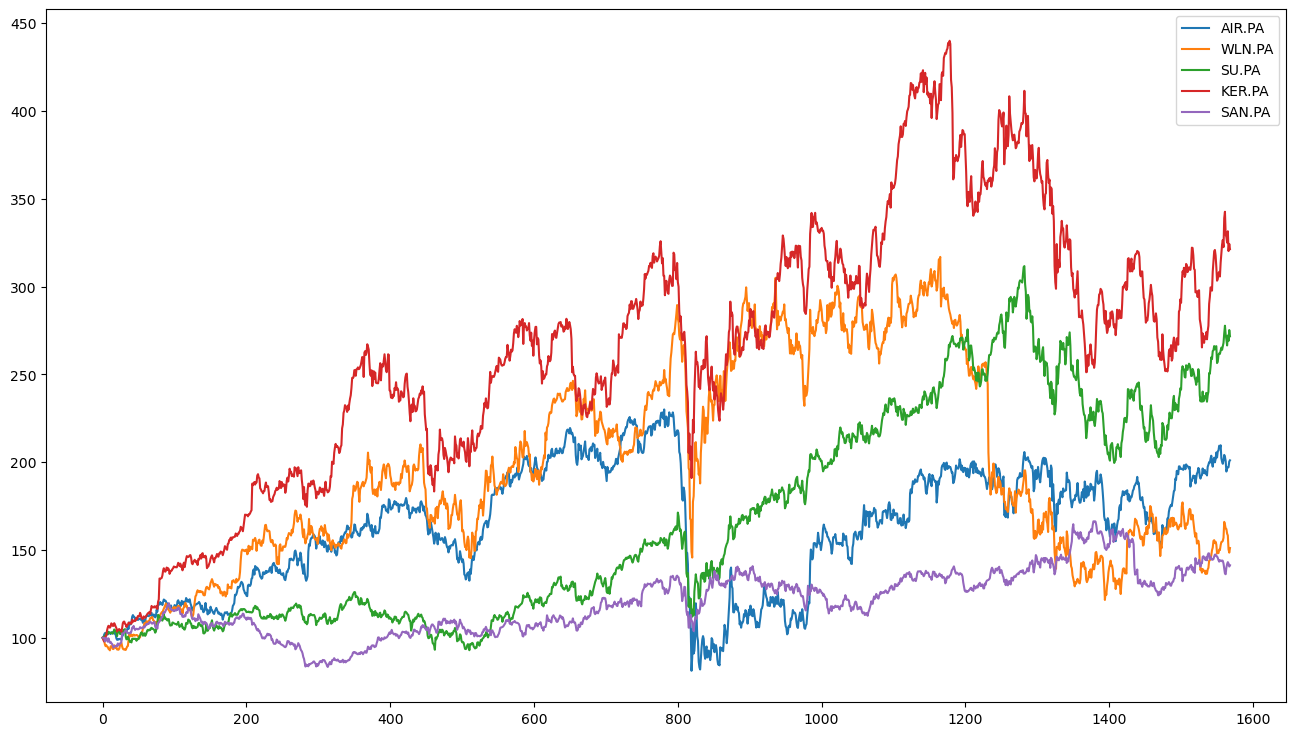

In [73]:
(mult_df_close/ mult_df_close.iloc[0] * 100).plot(figsize=(16, 9))

In [76]:
# Get the number of samples
days = len(mult_df.index)
days
returns = np.log(mult_df_close / mult_df_close.shift(1))
mean_ret = returns.mean() * days 
mean_ret

AIR.PA    0.698909
WLN.PA    0.413048
SU.PA     1.000188
KER.PA    1.168079
SAN.PA    0.346114
dtype: float64

In [77]:
returns.cov() * days

,AIR.PA,WLN.PA,SU.PA,KER.PA,SAN.PA
AIR.PA,0.963635,0.392688,0.359912,0.399944,0.120719
WLN.PA,0.392688,0.854762,0.282396,0.323895,0.085959
SU.PA,0.359912,0.282396,0.446000,0.308305,0.118031
KER.PA,0.399944,0.323895,0.308305,0.611696,0.092585
SAN.PA,0.120719,0.085959,0.118031,0.092585,0.258168


In [78]:
returns.corr()

,AIR.PA,WLN.PA,SU.PA,KER.PA,SAN.PA
AIR.PA,1.000000,0.432682,0.549000,0.520925,0.242030
WLN.PA,0.432682,1.000000,0.457371,0.447935,0.182987
SU.PA,0.549000,0.457371,1.000000,0.590263,0.347838
KER.PA,0.520925,0.447935,0.590263,1.000000,0.232983
SAN.PA,0.242030,0.182987,0.347838,0.232983,1.000000


In [85]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list

risk_free_rate = 0.0125

for x in range(10000):
    # Generate random weight where the sum equal 1
    p_weights = np.random.random(5)
    p_weights /= np.sum(p_weights)
    
    # Calculate the return of the portfolio using those weights
    ret_1 = np.sum(p_weights * returns.mean()) * days
    p_ret.append(ret_1)
    
    #  Calculate the volatility or standard deviation
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * days, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.72362814, 0.90875801, 0.70102065, ..., 0.74723015, 0.65484724,
        0.6744444 ]),
 array([0.59953832, 0.64038415, 0.56768652, ..., 0.62146637, 0.73361131,
        0.54483034]),
 array([1.18612624, 1.39956307, 1.21285363, ..., 1.18225247, 0.87559615,
        1.21495511]),
 array([[0.22466641, 0.23893754, 0.30930804, 0.09726638, 0.12982163],
        [0.21177538, 0.12132206, 0.27264125, 0.36678285, 0.02747846],
        [0.29461473, 0.11212742, 0.14803498, 0.17839818, 0.26682469],
        ...,
        [0.22049498, 0.26983641, 0.13811338, 0.26148199, 0.11007324],
        [0.5346632 , 0.25165886, 0.08079273, 0.06133808, 0.07154713],
        [0.02327883, 0.30296128, 0.3328731 , 0.09990167, 0.24098511]]))

## Plot

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

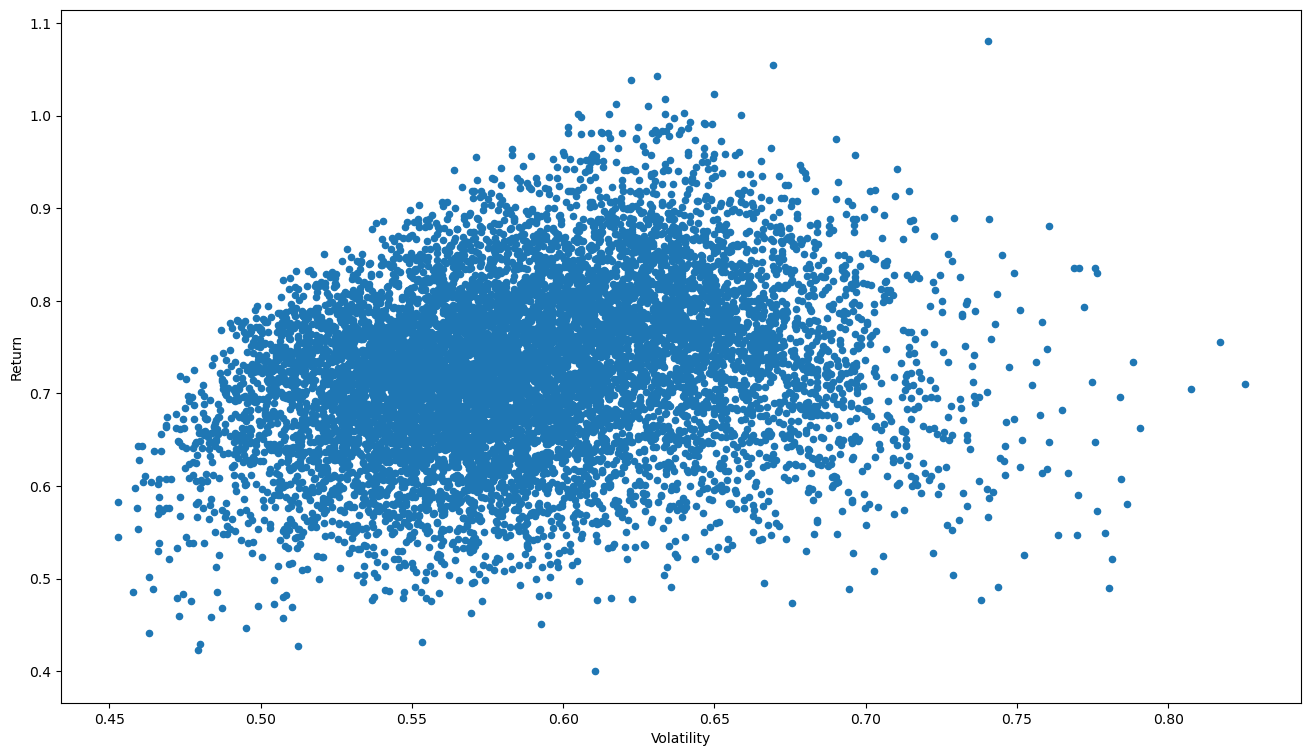

In [86]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

## Sharpe Ratio

In [93]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < 5:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[4296][i] * 100)))
    i += 1
    
# Find volatility of that portfolio
print("\nVolatility :", p_vol[4296])
      
# Find return of that portfolio
print("Return :", p_ret[4296])

Stock : AIR.PA : 17.39
Stock : WLN.PA : 39.82
Stock : SU.PA : 13.60
Stock : KER.PA : 19.82
Stock : SAN.PA : 9.37

Volatility : 0.6429192987106253
Return : 0.6860337860493257
